
🔍 Evaluating Random Forest...
Random Forest - Test MAE (Log-Space): 0.0009
Random Forest - Test R² Score: 0.9997
Random Forest - Test RMSE (Log-Space): 0.0081

--- Comparison with Expected Results ---
Expected MAE (Log-Space): 0.0008
Expected R² Score: 0.9997
Expected RMSE (Log-Space): 0.0081

✅ The verification script matches the main notebook results! Success.


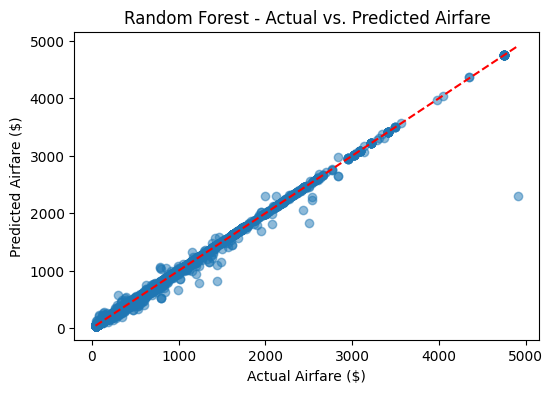


🔍 Evaluating Linear Regression...
Linear Regression - Test MAE (Log-Space): 0.2254
Linear Regression - Test R² Score: 0.4150

--- Comparison with Expected Results ---
Expected MAE (Log-Space): 0.2250
Expected R² Score: 0.4167

✅ The verification script matches the main notebook results! Success.


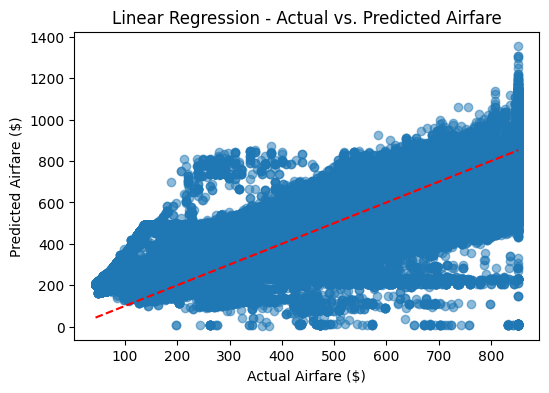

In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# Define paths and expected results
models_info = {
    "Random Forest": {
        "model_path": "../models/random_forest.pkl",
        "X_test_path": "../test_data/RandomForest/X_test_rf.pkl",
        "y_test_path": "../test_data/RandomForest/y_test_rf.pkl",
        "expected": {"RMSE": 0.0081, "MAE": 0.0008, "R2": 0.9997}  # Log-space
    },
    "Linear Regression": {
        "model_path": "../models/linear_regression.pkl",
        "X_test_path": "../test_data/LinearRegression/X_test_lr.pkl",
        "y_test_path": "../test_data/LinearRegression/y_test_lr.pkl",
        "expected": {"RMSE": None, "MAE": 0.2250, "R2": 0.4167}  # Log-space
    }
}

# Function to evaluate models
def evaluate_model(model_name, model_path, X_test_path, y_test_path):
    print(f"\n🔍 Evaluating {model_name}...")

    # Load test data
    X_test = joblib.load(X_test_path)
    y_test = joblib.load(y_test_path)
    model = joblib.load(model_path)

    # Make predictions
    predictions = model.predict(X_test).flatten()

    # ✅ Keep log-space for MAE comparison
    mae = mean_absolute_error(y_test, predictions)  # Keep in log-space
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions)) if model_name == "Random Forest" else None

    # ✅ Expected MAE should also be in log-space (DO NOT apply np.expm1)
    expected_mae = models_info[model_name]["expected"]["MAE"]

    # ✅ Convert for visualization (scatter plot only)
    y_test_actual = np.expm1(y_test)
    predictions_actual = np.expm1(predictions)

    # Print results
    print(f"{model_name} - Test MAE (Log-Space): {mae:.4f}")
    print(f"{model_name} - Test R² Score: {r2:.4f}")
    if rmse is not None:
        print(f"{model_name} - Test RMSE (Log-Space): {rmse:.4f}")

    # ✅ Expected values from main notebook
    expected = models_info[model_name]["expected"]

    print("\n--- Comparison with Expected Results ---")
    print(f"Expected MAE (Log-Space): {expected_mae:.4f}")
    print(f"Expected R² Score: {expected['R2']:.4f}")
    if rmse is not None:
        print(f"Expected RMSE (Log-Space): {expected['RMSE']:.4f}")

    # ✅ Check if results match expected values within tolerance
    mae_diff, r2_diff = abs(mae - expected_mae), abs(r2 - expected["R2"])

    if mae_diff < 0.01 and r2_diff < 0.01:
        print("\n✅ The verification script matches the main notebook results! Success.")
    else:
        print("\n⚠️ WARNING: The verification script does NOT match the main notebook results.")
        print(f"Difference in MAE (Log-Space): {mae_diff:.4f}")
        print(f"Difference in R²: {r2_diff:.4f}")

    # ✅ Visualize results in actual airfare dollars
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test_actual, predictions_actual, alpha=0.5)
    plt.xlabel("Actual Airfare ($)")
    plt.ylabel("Predicted Airfare ($)")
    plt.title(f"{model_name} - Actual vs. Predicted Airfare")
    plt.plot([min(y_test_actual), max(y_test_actual)], 
             [min(y_test_actual), max(y_test_actual)], 
             color='red', linestyle='--')  # Identity line
    plt.show()

# Run evaluations for Random Forest & Linear Regression
for model_name, info in models_info.items():
    evaluate_model(
        model_name=model_name,
        model_path=info["model_path"],
        X_test_path=info["X_test_path"],
        y_test_path=info["y_test_path"]
    )



✅ LSTM Model Loaded Successfully!
Fixed X_test shape: (28571, 7, 9)
893/893 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

--- LSTM Model Evaluation ---
LSTM - Test MAE: $119.63
LSTM - Test R² Score: -0.0517
LSTM - Test RMSE: $236.17

--- Comparison with Expected Results ---
Expected Test MAE: $120.76
Expected Test R² Score: -0.0469

✅ The verification script matches the main notebook results! Success.


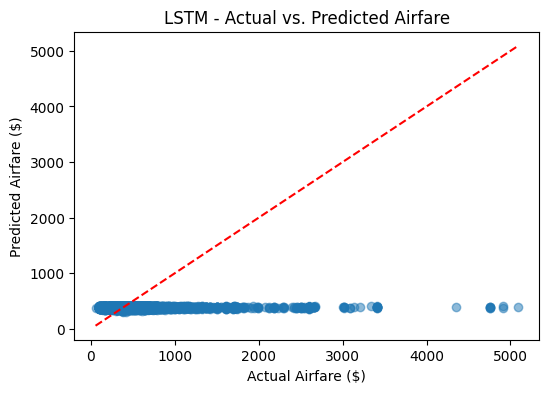

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define paths
model_path = "../models/lstm_model.h5"
lstm_test_data_dir = "../test_data/LSTM"

# Load test data
X_test = np.load(os.path.join(lstm_test_data_dir, "X_test_lstm.npy"))
y_test_real = np.load(os.path.join(lstm_test_data_dir, "y_test_lstm.npy"))

# Load trained LSTM model
model = load_model(model_path, compile=False)

print("\n✅ LSTM Model Loaded Successfully!")

# Fix shape if needed
sequence_length = 7
num_features = 9

if len(X_test.shape) == 2:
    num_samples = (X_test.shape[0] // sequence_length) * sequence_length
    X_test = X_test[:num_samples]  # Trim excess rows
    X_test = X_test.reshape((num_samples // sequence_length, sequence_length, num_features))
    print(f"Fixed X_test shape: {X_test.shape}")

# Make predictions
y_pred = np.expm1(model.predict(X_test).squeeze())  # Convert from log-space

# Ensure y_test_real matches predictions
y_test_real = y_test_real[-len(y_pred):]  # Align lengths

# Compute evaluation metrics
final_mae = mean_absolute_error(y_test_real, y_pred)
final_r2 = r2_score(y_test_real, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test_real, y_pred))

# Expected values from the main notebook
expected_mae, expected_r2 = 120.76, -0.0469

# ✅ Print results
print("\n--- LSTM Model Evaluation ---")
print(f"LSTM - Test MAE: ${final_mae:.2f}")
print(f"LSTM - Test R² Score: {final_r2:.4f}")
print(f"LSTM - Test RMSE: ${final_rmse:.2f}")

# ✅ Comparison with Expected Results
print("\n--- Comparison with Expected Results ---")
print(f"Expected Test MAE: ${expected_mae:.2f}")
print(f"Expected Test R² Score: {expected_r2:.4f}")

# ✅ Check if results match expected values within tolerance
mae_diff, r2_diff = abs(final_mae - expected_mae), abs(final_r2 - expected_r2)

if mae_diff < 5.00 and r2_diff < 0.05:
    print("\n✅ The verification script matches the main notebook results! Success.")
else:
    print("\n⚠️ WARNING: The verification script does NOT match the main notebook results.")
    print(f"Difference in MAE: {mae_diff:.2f}")
    print(f"Difference in R²: {r2_diff:.4f}")

# ✅ Visualization of actual vs. predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test_real, y_pred, alpha=0.5)
plt.xlabel("Actual Airfare ($)")
plt.ylabel("Predicted Airfare ($)")
plt.title("LSTM - Actual vs. Predicted Airfare")
plt.plot([min(y_test_real), max(y_test_real)], 
         [min(y_test_real), max(y_test_real)], 
         color='red', linestyle='--')  # Identity line
plt.show()
